# TASKS FROM ML COURSE

## Тема 1. Первичный анализ данных с Pandas

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
data = pd.read_csv(DATA_URL + "titanic_train.csv", index_col="PassengerId")

In [5]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


1. Сколько мужчин / женщин находилось на борту?

577 мужчин и 314 женщин

In [11]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

2. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?

108

In [16]:
data.groupby(["Pclass", "Sex"])["Sex"].count()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Sex, dtype: int64

3. Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.

Медиана – 14.45, стандартное отклонение – 49.69

In [19]:
round(data["Fare"].median(), 2), round(data["Fare"].std(), 2)

(14.45, 49.69)

4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

40.6% среди молодых и 22.7% среди старых

In [32]:
data_younger_30 = data[data["Age"] < 30]
data_older_30 = data[data["Age"] > 60]

round(data_younger_30["Survived"].mean() * 100, 1), round(data_older_30["Survived"].mean() * 100, 1)


(40.6, 22.7)

5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

18.9% среди мужчин и 74.2% среди женщин

In [34]:
data.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?

William

In [37]:
male_names = data[data['Sex'] == 'male']['Name'].str.extract(r',\s*Mr\.\s*([A-Za-z]+)')[0]

male_names.value_counts()

0
William    30
John       21
George     12
Charles    12
James      11
           ..
Ignjac      1
Yoto        1
Austen      1
Mitto       1
Johann      1
Name: count, Length: 262, dtype: int64

7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?

Да

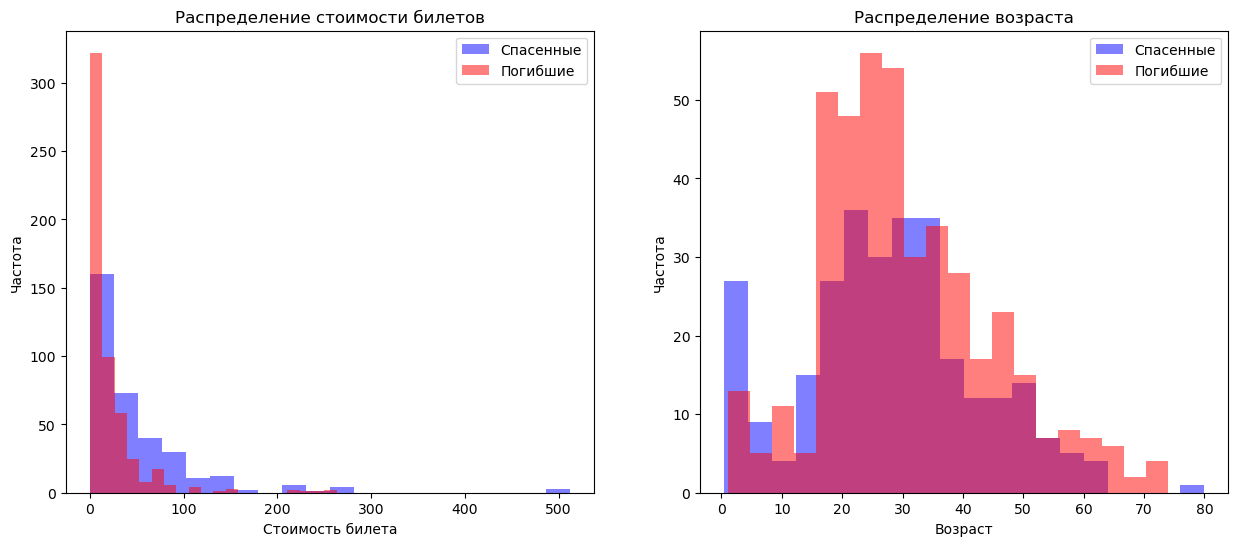

In [40]:
survived = data[data['Survived'] == 1]
died = data[data['Survived'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].hist(survived['Fare'].dropna(), bins=20, color='blue', alpha=0.5, label='Спасенные')
axes[0].hist(died['Fare'].dropna(), bins=20, color='red', alpha=0.5, label='Погибшие')
axes[0].set_title("Распределение стоимости билетов")
axes[0].set_xlabel("Стоимость билета")
axes[0].set_ylabel("Частота")
axes[0].legend()

axes[1].hist(survived['Age'].dropna(), bins=20, color='blue', alpha=0.5, label='Спасенные')
axes[1].hist(died['Age'].dropna(), bins=20, color='red', alpha=0.5, label='Погибшие')
axes[1].set_title("Распределение возраста")
axes[1].set_xlabel("Возраст")
axes[1].set_ylabel("Частота")
axes[1].legend()

8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:

В среднем мужчины 1-го класса старше 40 лет <br>
Мужчины всех классов в среднем старше женщин того же класса <br>
В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса <br>

In [45]:
data.groupby(["Pclass", "Sex"])["Age"].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

## Тема 2. Визуальный анализ данных

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [48]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
train_df = pd.read_csv(DATA_URL + "titanic_train.csv", index_col="PassengerId")

In [50]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [53]:
train_df = train_df.drop('Cabin', axis=1).dropna()

1. Постройте попарные зависимости признаков Age, Fare, Pclass, Sex, SibSp, Parch, Embarked и Survived. (метод scatter_matrix  Pandas или pairplot Seaborn).

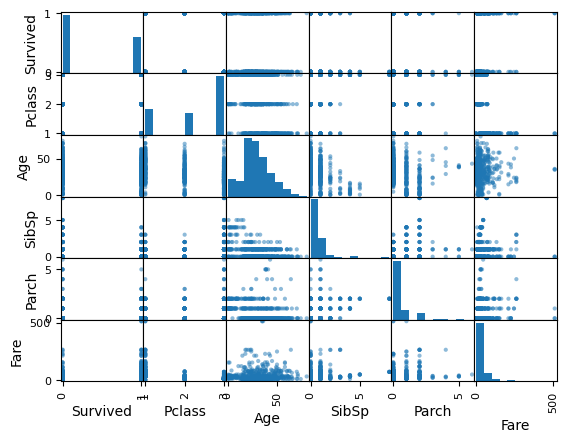

In [64]:
pd.plotting.scatter_matrix(data);

/Users/timurandronaki/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


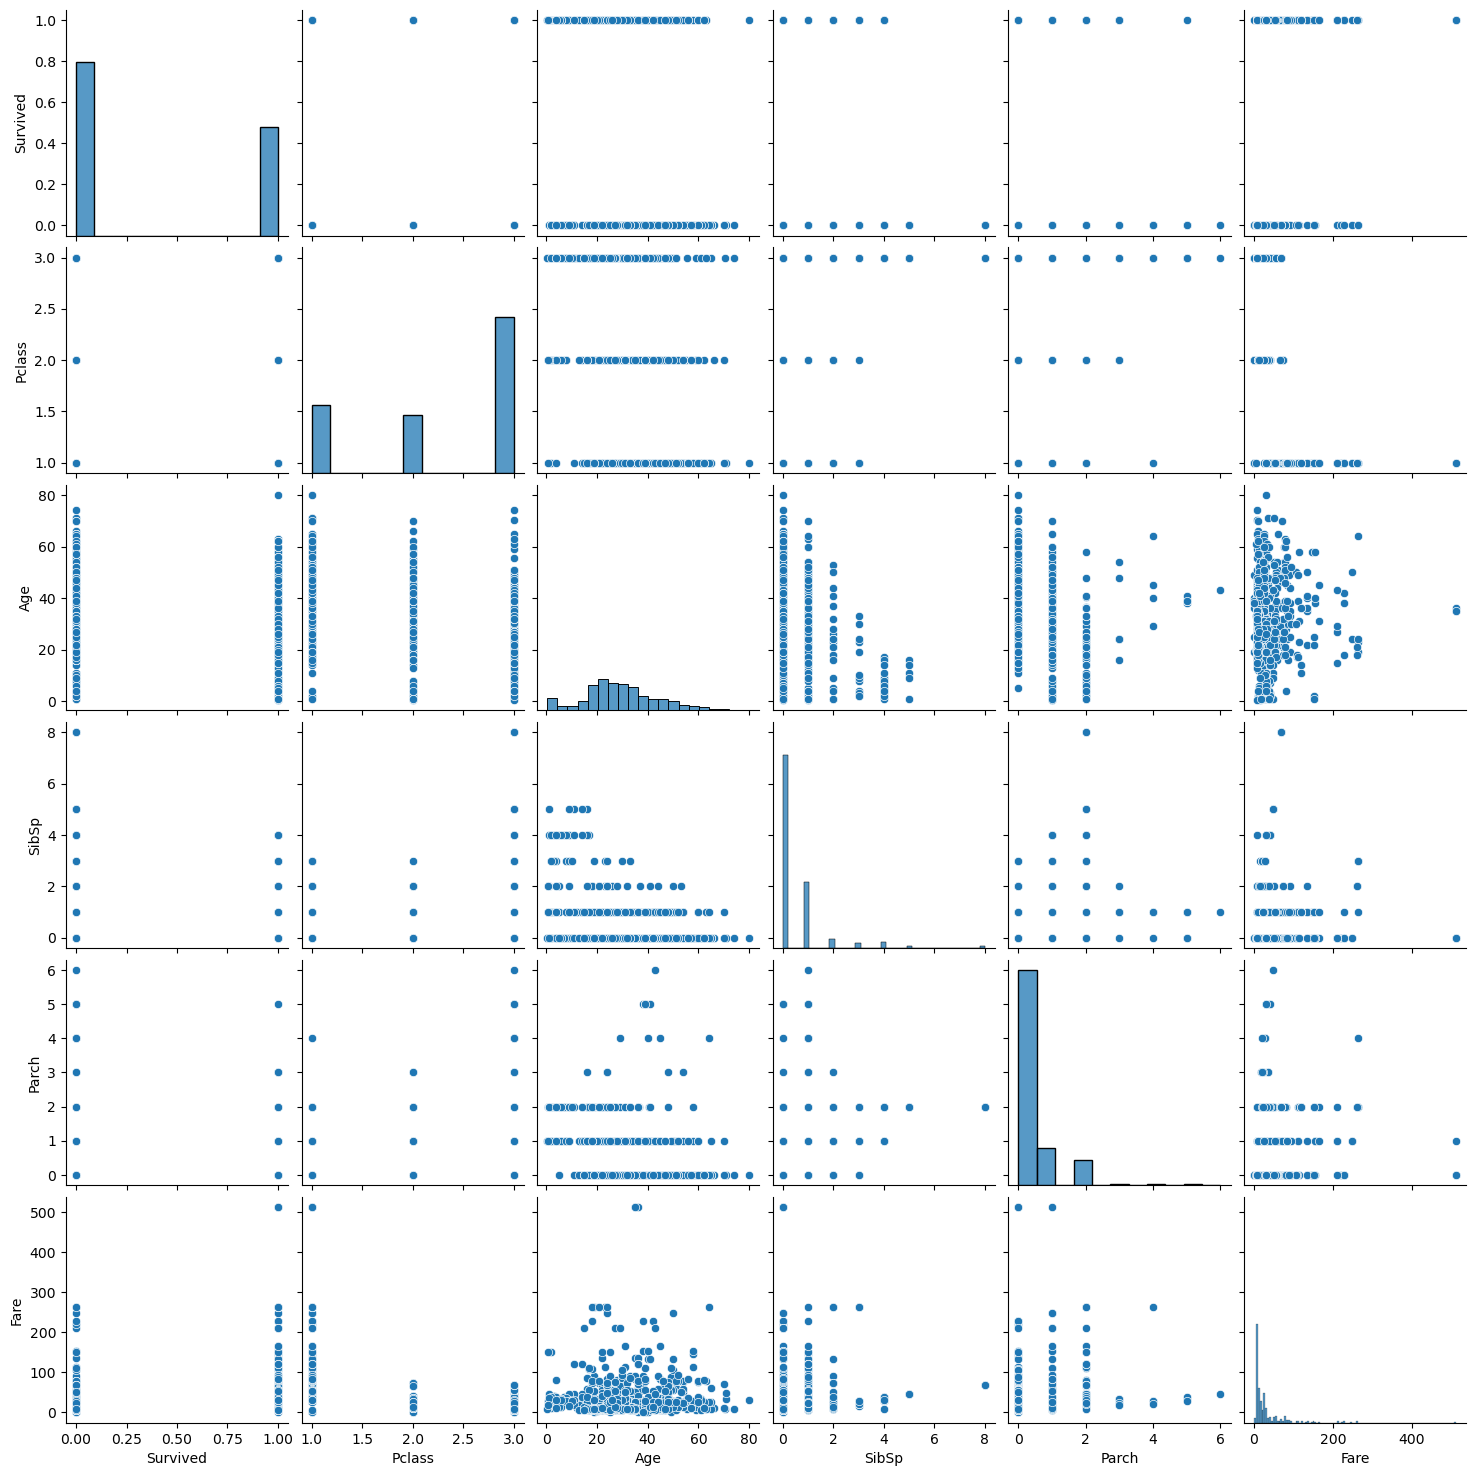

In [66]:
sns.pairplot(data);

2. Как плата за билет (Fare) зависит от класса каюты (Pclass)? Постройте boxplot.

Чем выше класс, теб дороже билет. Так же во всех классах замечены выбросы по стоимости

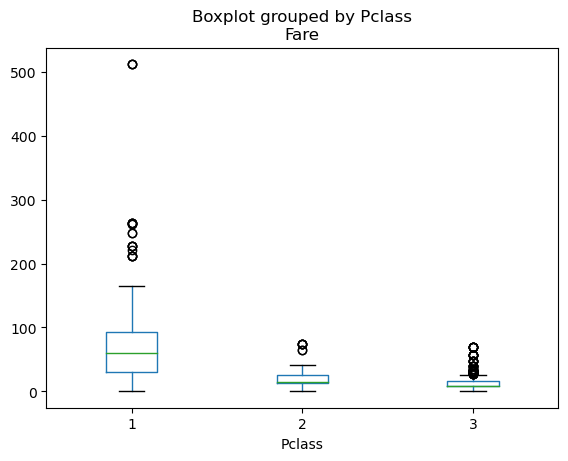

In [68]:
data.boxplot(column='Fare', by='Pclass', grid=False);

3. Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.

Умерло больше мужчин

<Axes: xlabel='Survived', ylabel='count'>

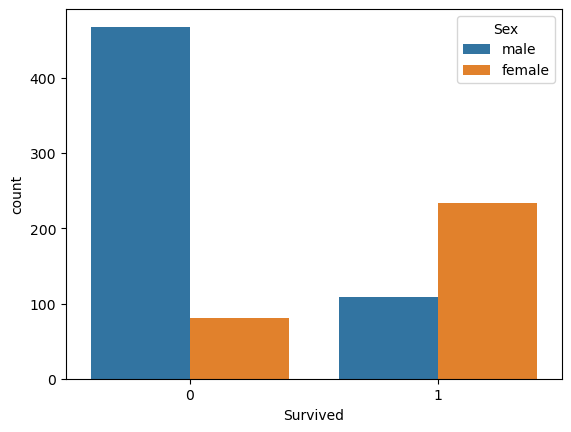

In [74]:
sns.countplot(x="Survived", hue="Sex", data=data)

4. Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.

Больше людей умерло в 3 классе

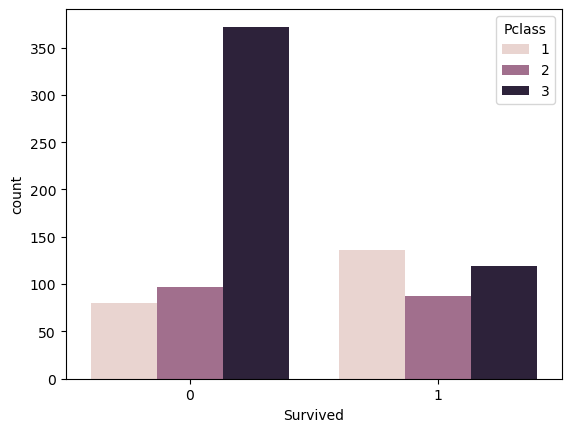

In [76]:
sns.countplot(x="Survived", hue="Pclass", data=data);

5. Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.

В абсолютном значении молодых умерло больше (их и было больше на корабле)

/var/folders/zf/t919jb2n1dv3fglq9757l39h0000gn/T/ipykernel_23501/18936100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_younger_30["AgeGroup"] = "Младше 30"
/var/folders/zf/t919jb2n1dv3fglq9757l39h0000gn/T/ipykernel_23501/18936100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_older_60["AgeGroup"] = "Старше 60"


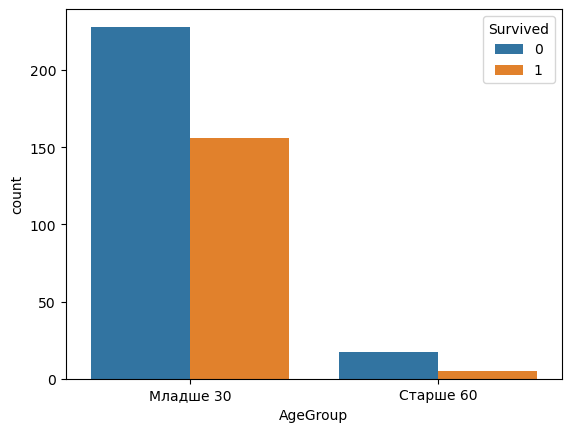

In [80]:
data_younger_30 = data[data["Age"] < 30]
data_older_60 = data[data["Age"] > 60]
data_younger_30["AgeGroup"] = "Младше 30"
data_older_60["AgeGroup"] = "Старше 60"
age_groups = pd.concat([data_younger_30, data_older_60])
sns.countplot(x="AgeGroup", hue="Survived", data=age_groups);

## Тема 3. Обучение с учителем. Методы классификации

In [81]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [99]:
def write_to_submission_file(
    predicted_labels,
    out_file="data.csv",
    train_num=891,
    target="Survived",
    index_label="PassengerId",
):
    predicted_df = pd.DataFrame(
        predicted_labels,
        index=np.arange(train_num + 1, train_num + 1 + predicted_labels.shape[0]),
        columns=[target],
    )
    predicted_df.to_csv(out_file, index_label=index_label)

In [84]:
train_df = pd.read_csv(DATA_URL + "titanic_train.csv")
test_df = pd.read_csv(DATA_URL + "titanic_test.csv")

In [85]:
y = train_df["Survived"]

In [86]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
train_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [88]:
test_df.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [89]:
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(train_df["Age"].median(), inplace=True)
train_df["Embarked"].fillna("S", inplace=True)
test_df["Fare"].fillna(train_df["Fare"].median(), inplace=True)

In [90]:
train_df = pd.concat(
    [
        train_df,
        pd.get_dummies(train_df["Pclass"], prefix="PClass"),
        pd.get_dummies(train_df["Sex"], prefix="Sex"),
        pd.get_dummies(train_df["SibSp"], prefix="SibSp"),
        pd.get_dummies(train_df["Parch"], prefix="Parch"),
        pd.get_dummies(train_df["Embarked"], prefix="Embarked"),
    ],
    axis=1,
)
test_df = pd.concat(
    [
        test_df,
        pd.get_dummies(test_df["Pclass"], prefix="PClass"),
        pd.get_dummies(test_df["Sex"], prefix="Sex"),
        pd.get_dummies(test_df["SibSp"], prefix="SibSp"),
        pd.get_dummies(test_df["Parch"], prefix="Parch"),
        pd.get_dummies(test_df["Embarked"], prefix="Embarked"),
    ],
    axis=1,
)

In [91]:
train_df.drop(
    [
        "Survived",
        "Pclass",
        "Name",
        "Sex",
        "SibSp",
        "Parch",
        "Ticket",
        "Cabin",
        "Embarked",
        "PassengerId",
    ],
    axis=1,
    inplace=True,
)
test_df.drop(
    [
        "Pclass",
        "Name",
        "Sex",
        "SibSp",
        "Parch",
        "Ticket",
        "Cabin",
        "Embarked",
        "PassengerId",
    ],
    axis=1,
    inplace=True,
)

In [92]:
set(test_df.columns) - set(train_df.columns)

{'Parch_9'}

In [93]:
test_df.drop(["Parch_9"], axis=1, inplace=True)

Обучите на имеющейся выборке дерево решений (DecisionTreeClassifier) максимальной глубины 2. Используйте параметр random_state=17 для воспроизводимости результатов.

In [95]:
tree = DecisionTreeClassifier(max_depth=2, random_state=17)
tree.fit(train_df, y)

DecisionTreeClassifier(max_depth=2, random_state=17)

**Сделайте с помощью полученной модели прогноз для тестовой выборки **

In [100]:
tree_predictions = tree.predict(test_df[train_df.columns])


Сформируйте файл посылки и отправьте на Kaggle

In [101]:
write_to_submission_file(tree_predictions)

Вопрос 1. Каков результат первой посылки (дерево решений без настройки параметров) в публичном рейтинге соревнования Titanic?

0.776

Дерево решений с настройкой параметров

Обучите на имеющейся выборке дерево решений (DecisionTreeClassifier). Также укажите random_state=17. Максимальную глубину и минимальное число элементов в листе настройте на 5-кратной кросс-валидации с помощью GridSearchCV.

In [122]:
tree_params = {"max_depth": list(range(1, 5)), "min_samples_leaf": list(range(1, 5))}

locally_best_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=17), tree_params, cv=5
)

locally_best_tree.fit(train_df, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 4]})

Вопрос 3. Каковы лучшие параметры дерева, настроенные на кросс-валидации с помощью GridSearchCV?

max_depth=3, min_samples_leaf=3

Вопрос 4. Какой получилась средняя доля верных ответов на кросс-валидации для дерева решений с лучшим сочетанием гиперпараметров max_depth и min_samples_leaf?

0.81

In [124]:

print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)

Best params: {'max_depth': 3, 'min_samples_leaf': 3}
Best cross validaton score 0.8103132257862031


In [125]:
tree_predictions = locally_best_tree.predict(test_df[train_df.columns])

In [126]:
write_to_submission_file(tree_predictions)

Вопрос 5. Каков результат второй посылки (дерево решений с настройкой гиперпараметров) в публичном рейтинге соревнования Titanic?

0.7799